In [1]:
import os, pickle

from scipy import linalg
import numpy as np
import pandas as pd

from scipy.stats import pearsonr, hmean

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
matrfoo = './drive/MyDrive/rscf/interp_polar/'
df2 = pd.read_pickle(matrfoo+'direction_vectors_1try.pkl')
df2

,w1,w2,dirvec
0,[АБСОЛЮТНЫЙ],[ОТНОСИТЕЛЬНЫЙ],"[-0.79730934, -0.08159757, 0.18309495, 0.37744..."
1,[АБСТРАКТНЫЙ],[КОНКРЕТНЫЙ],"[0.4348907, -0.06974429, 0.18800151, 0.0668311..."
2,[АД],[РАЙ],"[0.06703949, 0.010916829, 0.32012618, 0.094177..."
3,[АКТИВНО],[ПАССИВНО],"[0.666479, 0.6346973, 0.31362158, 0.20673168, ..."
4,[АКТИВНОСТЬ],[ПАССИВНОСТЬ],"[1.1858749, 0.37144738, 0.22581454, 0.22027759..."
...,...,...,...
764,"[ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ...","[ПЛОХОЙ, НЕХОРОШИЙ, СКВЕРНЫЙ, ДУРНОЙ, ХУДОЙ, О...","[0.093562216, -0.37713712, 0.21484661, -0.1282..."
765,"[ХУДЕТЬ, ХУДЕТЬ]","[ТОЛСТЕТЬ, ПОЛНЕТЬ]","[-0.11910862, 0.5742371, -1.2652992, -0.262936..."
766,[ЦЕНТРОБЕЖНЫЙ],[ЦЕНТРОСТРЕМИТЕЛЬНЫЙ],"[0.43000627, 0.36228955, 0.26274383, 0.1713920..."
767,"[ЧУЖОЙ, ЧУЖОЙ]","[РОДНОЙ, СВОЙ]","[0.01956962, 0.18546572, -0.62405956, 0.427948..."


In [30]:
unite = lambda x: '\t' + ' '.join(list(set(x.w1))).lower() + '\t' + ' '.join(list(set(x.w2))).lower()
polarnames = df2.loc[:,['w1','w2']].apply(unite, axis=1)
polarnames = polarnames.index.astype(str) + polarnames
polarnames

0                           0\tабсолютный\tотносительный
1                             1\tабстрактный\tконкретный
2                                             2\tад\tрай
3                                   3\tактивно\tпассивно
4                             4\tактивность\tпассивность
                             ...                        
764    764\tхороший\tнехороший плохой худой отвратите...
765                        765\tхудеть\tполнеть толстеть
766               766\tцентробежный\tцентростремительный
767                              767\tчужой\tсвой родной
768              768\tясный\tтуманный смутный непонятный
Length: 769, dtype: object

In [31]:
df2['scale'] = polarnames
df2

,w1,w2,dirvec,scale
0,[АБСОЛЮТНЫЙ],[ОТНОСИТЕЛЬНЫЙ],"[-0.79730934, -0.08159757, 0.18309495, 0.37744...",0\tабсолютный\tотносительный
1,[АБСТРАКТНЫЙ],[КОНКРЕТНЫЙ],"[0.4348907, -0.06974429, 0.18800151, 0.0668311...",1\tабстрактный\tконкретный
2,[АД],[РАЙ],"[0.06703949, 0.010916829, 0.32012618, 0.094177...",2\tад\tрай
3,[АКТИВНО],[ПАССИВНО],"[0.666479, 0.6346973, 0.31362158, 0.20673168, ...",3\tактивно\tпассивно
4,[АКТИВНОСТЬ],[ПАССИВНОСТЬ],"[1.1858749, 0.37144738, 0.22581454, 0.22027759...",4\tактивность\tпассивность
...,...,...,...,...
764,"[ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ...","[ПЛОХОЙ, НЕХОРОШИЙ, СКВЕРНЫЙ, ДУРНОЙ, ХУДОЙ, О...","[0.093562216, -0.37713712, 0.21484661, -0.1282...",764\tхороший\tнехороший плохой худой отвратите...
765,"[ХУДЕТЬ, ХУДЕТЬ]","[ТОЛСТЕТЬ, ПОЛНЕТЬ]","[-0.11910862, 0.5742371, -1.2652992, -0.262936...",765\tхудеть\tполнеть толстеть
766,[ЦЕНТРОБЕЖНЫЙ],[ЦЕНТРОСТРЕМИТЕЛЬНЫЙ],"[0.43000627, 0.36228955, 0.26274383, 0.1713920...",766\tцентробежный\tцентростремительный
767,"[ЧУЖОЙ, ЧУЖОЙ]","[РОДНОЙ, СВОЙ]","[0.01956962, 0.18546572, -0.62405956, 0.427948...",767\tчужой\tсвой родной


In [43]:
for expr in df2.scale:
  if 'ё' in expr:
    print(expr)

24	безнадёжность	надежда
33	белый	чёрный
49	благонадёжный	неблагонадёжный
56	ближайший	отдалённый
57	ближний	далёкий дальний
58	близкий	далёкий дальний
59	близкий	чужой далёкий
63	близость	отдалённость
121	весёлость	горе
122	весёлый	скучный
123	весёлый	печальный унылый грустный
124	весёлый	мрачный угрюмый
163	вперёд	назад
176	всё	ничто
259	дешёвый	дорогой
267	днём	ночью
298	живой	мёртвый неживой
299	живой	покойник мёртвый
401	лёгкий	тяжелый
402	легкий	тяжелый тяжкий трудный нелёгкий
403	лёгкий	крепкий
404	лёгкий	сильный крепкий
405	лёгкий	серьёзный
407	лёгкость	трудность
448	молодёжь	старики
458	морозный	тёплый
462	мягкий	чёрствый
463	мягкость	твёрдость
498	неопределённый	определённый
515	непросвещённый	просвещённый
551	обнадёживаться	отчаиваться
573	отвлечённо	реально
591	падение	взлёт подъём
594	печаль	весёлость
611	подъём	падение упалок
612	подъём	спуск
641	простой	замысловатый затейливый мудрёный
675	редкий	распространённый
690	светлый	тёмный
692	светлый	мрачный тёмный
693	светлый	

In [33]:
freqs = pd.read_csv(matrfoo+'freqrnc2011.csv', sep = '\t', index_col=0)
freqs

,PoS,Freq(ipm),R,D,Doc
Lemma,,,,,
а,conj,8198.0,100,97,32332
а,intj,19.8,99,90,757
а,part,6.1,59,79,128
а,s,2.7,59,85,160
аа,intj,1.5,47,80,68
...,...,...,...,...,...
ящерица,s,3.6,77,74,158
ящерка,s,0.4,27,82,33
ящик,s,75.4,100,94,1810


In [87]:
freqs['Freq(ipm)'].loc['абсолютный']

42.3

In [88]:
x = freqs['Freq(ipm)'].loc['убогий'.replace('ё','е')]
x

Lemma
убогий    11.7
убогий     0.7
Name: Freq(ipm), dtype: float64

In [89]:
type(x) == pd.Series

True

In [90]:
x[0]

11.7

In [93]:
FR1, FR2 = [], []
for expr in df2.scale:
  print(expr)
  [n, ws1, ws2] = expr.split('\t')
  freq1, freq2 = 0, 0
  for w in ws1.split():
    try:
      f = freqs['Freq(ipm)'].loc[w.replace('ё','е')]
    except:
      f=0
    if type(f) == pd.Series:
      f = f[0]
    freq1 += f
  FR1.append(freq1)
  for w in ws2.split():
    try:
      f = freqs['Freq(ipm)'].loc[w.replace('ё','е')]
    except:
      f=0
    if type(f) == pd.Series:
      f = f[0]
    print(f)
    freq2 += f
  FR2.append(freq2)
df2['w1-freq'] = FR1
df2['w2-freq'] = FR2


0	абсолютный	относительный
19.3
1	абстрактный	конкретный
118.1
2	ад	рай
26.0
3	активно	пассивно
1.2
4	активность	пассивность
2.7
5	активный	пассивный
10.5
6	альтруизм	эгоизм
5.9
7	альтруист	эгоист
3.4
8	антипатия	симпатия
18.9
9	беда	радость счастье
137.2
149.2
10	беда	удача
41.3
11	бедно	богато
4.0
12	бедность	богатство
38.1
13	бедный	богатый
85.0
14	бедный	богач богатый
7.6
85.0
15	бедняк	богач богатый
7.6
85.0
16	бедствие	благо
10.0
17	бездарность	талантливость
0.8
18	бездарность	талант
62.0
19	бездарный	талантливый
48.2
20	безделье	дело
1412.1
21	бездельничать	работать
611.2
22	беззаконие	закон
433.4
23	безлюдный	людный
2.4
24	безнадёжность	надежда
154.5
25	безначальный	бесконечный
48.7
26	безнравственный	нравственный
36.8
27	безобразный	красивый прекрасный
177.2
148.4
28	безымянный	именитый
5.0
29	белеть	чернеть
6.8
30	белить	чернить
0.8
31	беловой	черновой
3.2
32	белоручка	чернорабочий
0.5
33	белый	чёрный
337.5
34	бесконечный	конечный
56.2
35	бескорыстный	корыстный
4.7
36	беспоко

In [94]:
df2

,w1,w2,dirvec,scale,w1-freq,w2-freq
0,[АБСОЛЮТНЫЙ],[ОТНОСИТЕЛЬНЫЙ],"[-0.79730934, -0.08159757, 0.18309495, 0.37744...",0\tабсолютный\tотносительный,42.3,19.3
1,[АБСТРАКТНЫЙ],[КОНКРЕТНЫЙ],"[0.4348907, -0.06974429, 0.18800151, 0.0668311...",1\tабстрактный\tконкретный,15.9,118.1
2,[АД],[РАЙ],"[0.06703949, 0.010916829, 0.32012618, 0.094177...",2\tад\tрай,23.7,26.0
3,[АКТИВНО],[ПАССИВНО],"[0.666479, 0.6346973, 0.31362158, 0.20673168, ...",3\tактивно\tпассивно,52.6,1.2
4,[АКТИВНОСТЬ],[ПАССИВНОСТЬ],"[1.1858749, 0.37144738, 0.22581454, 0.22027759...",4\tактивность\tпассивность,58.5,2.7
...,...,...,...,...,...,...
764,"[ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ...","[ПЛОХОЙ, НЕХОРОШИЙ, СКВЕРНЫЙ, ДУРНОЙ, ХУДОЙ, О...","[0.093562216, -0.37713712, 0.21484661, -0.1282...",764\tхороший\tнехороший плохой худой отвратите...,471.4,332.2
765,"[ХУДЕТЬ, ХУДЕТЬ]","[ТОЛСТЕТЬ, ПОЛНЕТЬ]","[-0.11910862, 0.5742371, -1.2652992, -0.262936...",765\tхудеть\tполнеть толстеть,3.1,1.8
766,[ЦЕНТРОБЕЖНЫЙ],[ЦЕНТРОСТРЕМИТЕЛЬНЫЙ],"[0.43000627, 0.36228955, 0.26274383, 0.1713920...",766\tцентробежный\tцентростремительный,2.7,0.5
767,"[ЧУЖОЙ, ЧУЖОЙ]","[РОДНОЙ, СВОЙ]","[0.01956962, 0.18546572, -0.62405956, 0.427948...",767\tчужой\tсвой родной,159.6,3945.8


In [101]:
df2.to_pickle(matrfoo+'direction_vectors_1try_freqs.pkl')

In [100]:
df2['mean-freq'] = (df2['w1-freq'] + df2['w2-freq'])/2.
df2['harm-freq'] = hmean([df2['w1-freq'], df2['w2-freq']]).round(2)
df2

,w1,w2,dirvec,scale,w1-freq,w2-freq,mean-freq,harm-freq
0,[АБСОЛЮТНЫЙ],[ОТНОСИТЕЛЬНЫЙ],"[-0.79730934, -0.08159757, 0.18309495, 0.37744...",0\tабсолютный\tотносительный,42.3,19.3,30.80,26.51
1,[АБСТРАКТНЫЙ],[КОНКРЕТНЫЙ],"[0.4348907, -0.06974429, 0.18800151, 0.0668311...",1\tабстрактный\tконкретный,15.9,118.1,67.00,28.03
2,[АД],[РАЙ],"[0.06703949, 0.010916829, 0.32012618, 0.094177...",2\tад\tрай,23.7,26.0,24.85,24.80
3,[АКТИВНО],[ПАССИВНО],"[0.666479, 0.6346973, 0.31362158, 0.20673168, ...",3\tактивно\tпассивно,52.6,1.2,26.90,2.35
4,[АКТИВНОСТЬ],[ПАССИВНОСТЬ],"[1.1858749, 0.37144738, 0.22581454, 0.22027759...",4\tактивность\tпассивность,58.5,2.7,30.60,5.16
...,...,...,...,...,...,...,...,...
764,"[ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ХОРОШИЙ, ...","[ПЛОХОЙ, НЕХОРОШИЙ, СКВЕРНЫЙ, ДУРНОЙ, ХУДОЙ, О...","[0.093562216, -0.37713712, 0.21484661, -0.1282...",764\tхороший\tнехороший плохой худой отвратите...,471.4,332.2,401.80,389.74
765,"[ХУДЕТЬ, ХУДЕТЬ]","[ТОЛСТЕТЬ, ПОЛНЕТЬ]","[-0.11910862, 0.5742371, -1.2652992, -0.262936...",765\tхудеть\tполнеть толстеть,3.1,1.8,2.45,2.28
766,[ЦЕНТРОБЕЖНЫЙ],[ЦЕНТРОСТРЕМИТЕЛЬНЫЙ],"[0.43000627, 0.36228955, 0.26274383, 0.1713920...",766\tцентробежный\tцентростремительный,2.7,0.5,1.60,0.84
767,"[ЧУЖОЙ, ЧУЖОЙ]","[РОДНОЙ, СВОЙ]","[0.01956962, 0.18546572, -0.62405956, 0.427948...",767\tчужой\tсвой родной,159.6,3945.8,2052.70,306.79


In [106]:
df2['mean-freq'].describe(), df2['harm-freq'].describe()

(count     769.000000
 mean       98.419636
 std       184.414407
 min         0.000000
 25%        12.500000
 50%        39.300000
 75%       102.400000
 max      2052.700000
 Name: mean-freq, dtype: float64, count    769.000000
 mean      57.915215
 std      108.179219
 min        0.000000
 25%        5.880000
 50%       18.700000
 75%       64.360000
 max      931.760000
 Name: harm-freq, dtype: float64)

<AxesSubplot:>

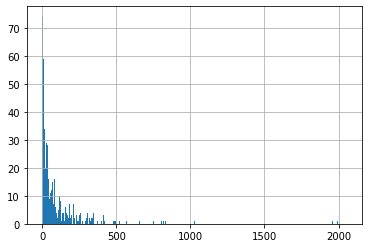

In [103]:
df2['mean-freq'].hist(bins=500)

<AxesSubplot:>

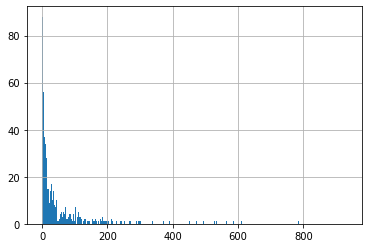

In [104]:
df2['harm-freq'].hist(bins=500)

In [108]:
df2.sort_values(by = 'harm-freq', ascending = False)

,w1,w2,dirvec,scale,w1-freq,w2-freq,mean-freq,harm-freq
592,[ПЕРВЫЙ],[ПОСЛЕДНИЙ],"[0.6255257, -0.29897884, 0.46037254, -0.062655...",592\tпервый\tпоследний,1345.6,712.6,1029.10,931.76
248,[ДА],[НЕТ],"[0.5120059, -0.43209615, 0.23673654, -0.281675...",248\tда\tнет,801.0,874.0,837.50,835.91
79,"[БОЛЬШОЙ, БОЛЬШОЙ, БОЛЬШОЙ]","[МАЛЕНЬКИЙ, МАЛЫЙ, МЕЛКИЙ]","[-0.29120123, -0.2500919, -0.30710864, 0.18916...",79\tбольшой\tмаленький малый мелкий,944.4,672.8,808.60,785.79
80,"[БОЛЬШОЙ, БОЛЬШОЙ]","[МАЛЕНЬКИЙ, МАЛЫЙ]","[0.33242887, -0.2090078, -0.4863915, 0.0383147...",80\tбольшой\tмаленький малый,944.4,564.3,754.35,706.47
547,"[НОВЫЙ, НОВЫЙ]","[СТАРЫЙ, СТАРИННЫЙ]","[0.47129497, 0.42054212, 0.8971596, -0.2949520...",547\tновый\tстарый старинный,1217.5,417.6,817.55,621.89
...,...,...,...,...,...,...,...,...
550,[ОБЕДНЯТЬСЯ],[ОБОГАЩАТЬСЯ],"[0.05568385, -0.19588435, 0.27673727, 0.564180...",550\tобедняться\tобогащаться,0.0,1.8,0.90,0.00
540,[НЕЦЕЛОМУДРЕННО],[ЦЕЛОМУДРЕННО],"[-1.1013861, 0.7156417, 0.7459936, 0.70502895,...",540\tнецеломудренно\tцеломудренно,0.0,0.7,0.35,0.00
365,[ИСКРЕННО],[НЕИСКРЕННО],"[1.5081062, 1.1079888, 1.5027258, -0.123980135...",365\tискренно\tнеискренно,1.6,0.0,0.80,0.00
521,[НЕСОЧУВСТВИЕ],[СОЧУВСТВИЕ],"[0.09249388, 1.0347997, -1.3841916, 0.7790834,...",521\tнесочувствие\tсочувствие,0.0,18.3,9.15,0.00


In [ ]:
meanfreq(polarnames[768])

(Lemma
 ясный         90.8
 непонятный    48.8
 туманный      12.4
 смутный       17.5
 Name: Freq(ipm), dtype: float64, 23.627669852192355)